# 13.1 Backtesting
I will try out a popular strategy using the IBS indicator. I want to see if I can match the results on [here](https://www.quantifiedstrategies.com/internal-bar-strength-ibs-indicator-strategy/). I will also use pure pandas.

* Universe: SPY ETF
* Entry: IBS < 0.2
* Exit: IBS > 0.8
* Trading on close prices.

In [1]:
from utils import get_data, get_id
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [45]:
daily = get_data(get_id("SPY"), columns=['open', 'high', 'low', 'close'])

# Calculate indicator and signals
daily['IBS'] = (daily.close - daily.low) / (daily.high - daily.low)
conditions = [daily['IBS'] <= 0.2, daily['IBS'] >= 0.8]
choices = [1, 0]
daily['signal_eod'] = np.select(conditions, choices, default=np.nan)
daily['signal_eod'] = daily['signal_eod'].ffill()

# Calculate strategy results
daily['return'] = daily.close.pct_change()
daily['strategy_return'] = daily['signal_eod'].shift(1) * daily['return']
daily['strategy_cumulative_return'] = (1 + daily['strategy_return']).cumprod() - 1

daily.drop(columns=['open', 'high', 'low']).head()

,close,IBS,signal_eod,return,strategy_return,strategy_cumulative_return
datetime,,,,,,
2019-01-02,232.385259,0.819392,0.0,NaN,NaN,NaN
2019-01-03,226.693092,0.093878,1.0,-0.024495,-0.000000,0.000000
2019-01-04,234.437410,0.892256,0.0,0.034162,0.034162,0.034162
2019-01-07,236.127417,0.610329,0.0,0.007209,0.000000,0.034162
2019-01-08,238.355998,0.812689,0.0,0.009438,0.000000,0.034162


Text(0.5, 1.0, 'IBS strategy')

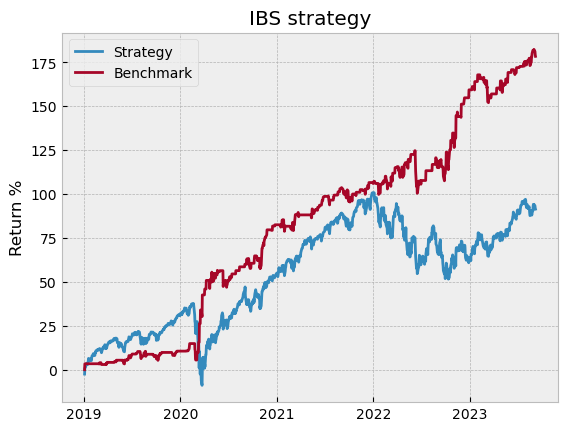

In [48]:
# Plot performance
plt.style.use('bmh')
fig, ax = plt.subplots()
ax.plot(daily.index, ((1 + daily['return']).cumprod() - 1)*100, label='Strategy')
ax.plot(daily.index, daily.strategy_cumulative_return * 100, label='Benchmark')
ax.legend()
ax.set_ylabel('Return %')
ax.set_title('IBS strategy')